In [0]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
matplotlib.rcParams['figure.dpi'] = 144
from collections import Counter
import pandas as pd
import re
import requests
import json
#import dill
from bs4 import BeautifulSoup
from datetime import datetime

Get all the H1B information from https://h1bdata.info/index.php. Including 2013-2018 and companies in ['google','facebook','amazon','microsoft','uber','apple','intel','airbnb','oracle','nvidia','cisco','lyft','slack','robinhood','tesla','waymo','snap','linkedin','dropbox','yelp','netflix','expedia','priceline','ebay','paypal','glassdoor','coursera','udacity','twitter','salesforce','adobe']

In [2]:
def JOBTITLE_helper(title):
    t = title.split(' ')
    res = []
    for s in t:
        if s.isalpha():
            res.append(s)
    ans = ''
    for r in res:
        ans +=r
        ans +=' '
    return(ans)
    
def download(year,employer):
    page = requests.get('https://h1bdata.info/index.php?em='+str(employer)+'&year=' + str(year)) # Use requests.get to download the page.
    soup = BeautifulSoup(page.text, "lxml")
    table = soup.find_all('table')[0]
    df = pd.read_html(str(table))[0]
    if len(df) >0:
        df['JOB TITLE CLEAR'] = df.apply(lambda f: JOBTITLE_helper(f['JOB TITLE']), axis=1)
        df['YEAR'] = year
        df['EMPLOYER_CLEAR'] = employer
        return(df)
    else:
        return()

df_list=[] 
employer_list = ['google','facebook','amazon','microsoft','uber','apple','intel','airbnb','oracle','nvidia','cisco','lyft','slack','robinhood','tesla','waymo','snap','linkedin','dropbox','yelp','netflix','expedia','priceline','ebay','paypal','glassdoor','coursera','udacity','twitter','salesforce','adobe']
test = ['slack','robinhood','tesla','waymo','snap','linkedin','dropbox','yelp','netflix','expedia','priceline','ebay','paypal','glassdoor','coursera','udacity','twitter','salesforce','adobe']

for employer in employer_list:   
    for year in range(2013,2019):
        df_temp = download(year,employer)
        print(employer, year)
        print(len(df_temp))
        if len(df_temp)>0:
            df_list.append(df_temp) 

df = pd.concat(df_list, ignore_index=True)
    

print(df.head())
df.to_pickle('h1b_all_database_r1')

google 2013
278
google 2014
2636
google 2015
3361
google 2016
3460
google 2017
3581
google 2018
5101
facebook 2013
55
facebook 2014
753
facebook 2015
943
facebook 2016
1142
facebook 2017
1746
facebook 2018
2401
amazon 2013
406
amazon 2014
2046
amazon 2015
2464
amazon 2016
3365
amazon 2017
5244
amazon 2018
6730
microsoft 2013
610
microsoft 2014
3420
microsoft 2015
4381
microsoft 2016
4618
microsoft 2017
4922
microsoft 2018
4955
uber 2013
12
uber 2014
119
uber 2015
426
uber 2016
557
uber 2017
794
uber 2018
938
apple 2013
280
apple 2014
1512
apple 2015
1767
apple 2016
1472
apple 2017
1939
apple 2018
1631
intel 2013
446
intel 2014
3132
intel 2015
2492
intel 2016
2625
intel 2017
2658
intel 2018
2448
airbnb 2013
1
airbnb 2014
47
airbnb 2015
103
airbnb 2016
163
airbnb 2017
271
airbnb 2018
299
oracle 2013
191
oracle 2014
1096
oracle 2015
1017
oracle 2016
974
oracle 2017
961
oracle 2018
918
nvidia 2013
32
nvidia 2014
165
nvidia 2015
207
nvidia 2016
305
nvidia 2017
294
nvidia 2018
455
cisco 2013

check the df

In [3]:
df = pd.read_pickle('h1b_all_database_r1')
print(df.head())
print('total number of cases is ' + str(len(df)))

     EMPLOYER          JOB TITLE  BASE SALARY           LOCATION SUBMIT DATE  \
0  GOOGLE INC   ACCOUNT DIRECTOR        65000  MOUNTAIN VIEW, CA  11/12/2013   
1  GOOGLE INC  ACCOUNT EXECUTIVE        79100  SAN FRANCISCO, CA  12/04/2013   
2  GOOGLE INC    ACCOUNT MANAGER        83000       NEW YORK, NY  12/30/2013   
3  GOOGLE INC    ACCOUNT MANAGER        83000       NEW YORK, NY  12/30/2013   
4  GOOGLE INC         ACCOUNTANT        85000  MOUNTAIN VIEW, CA  10/24/2013   

   START DATE CASE STATUS     JOB TITLE CLEAR  YEAR EMPLOYER_CLEAR  
0  04/18/2014   CERTIFIED   ACCOUNT DIRECTOR   2013         google  
1  12/05/2013   CERTIFIED  ACCOUNT EXECUTIVE   2013         google  
2  02/10/2014   WITHDRAWN    ACCOUNT MANAGER   2013         google  
3  02/10/2014   CERTIFIED    ACCOUNT MANAGER   2013         google  
4  11/18/2013   CERTIFIED         ACCOUNTANT   2013         google  
total number of cases is 130480


plot the avg H1B filed salary over the years of different companies.

<Figure size 864x576 with 0 Axes>

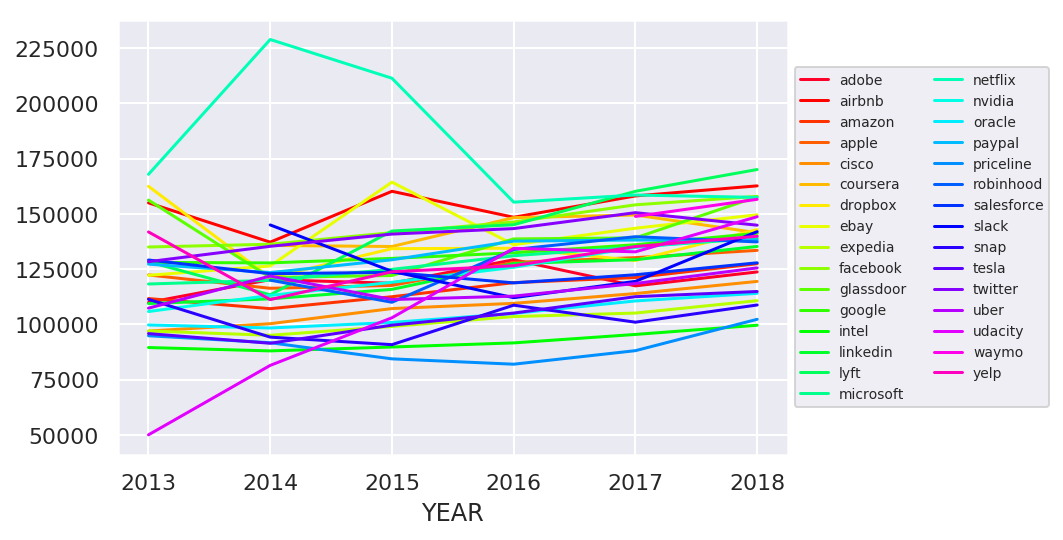

In [4]:
plt.figure()
df.groupby(['YEAR','EMPLOYER_CLEAR'])['BASE SALARY'].mean().unstack().plot(colormap = 'gist_rainbow')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize = 'xx-small', ncol=2)
plt.plot(subplots=True)
#plt.savefig('final_test_1',dpi=200, bbox_inches="tight")
plt.show()

plot the average salary of different job titles (eg. Software engineer, data scientist). From a list of companies.

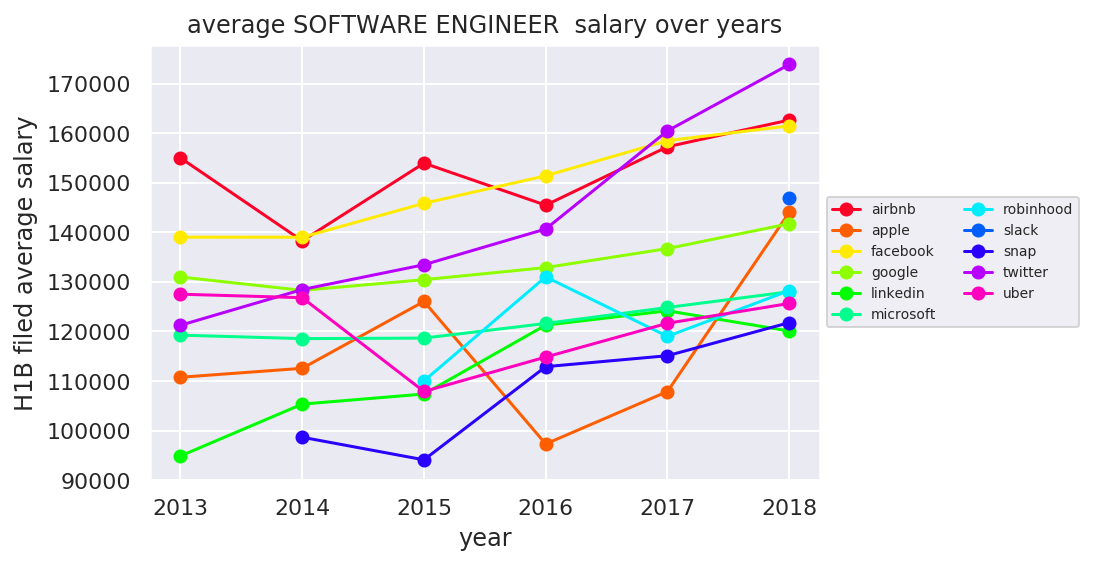

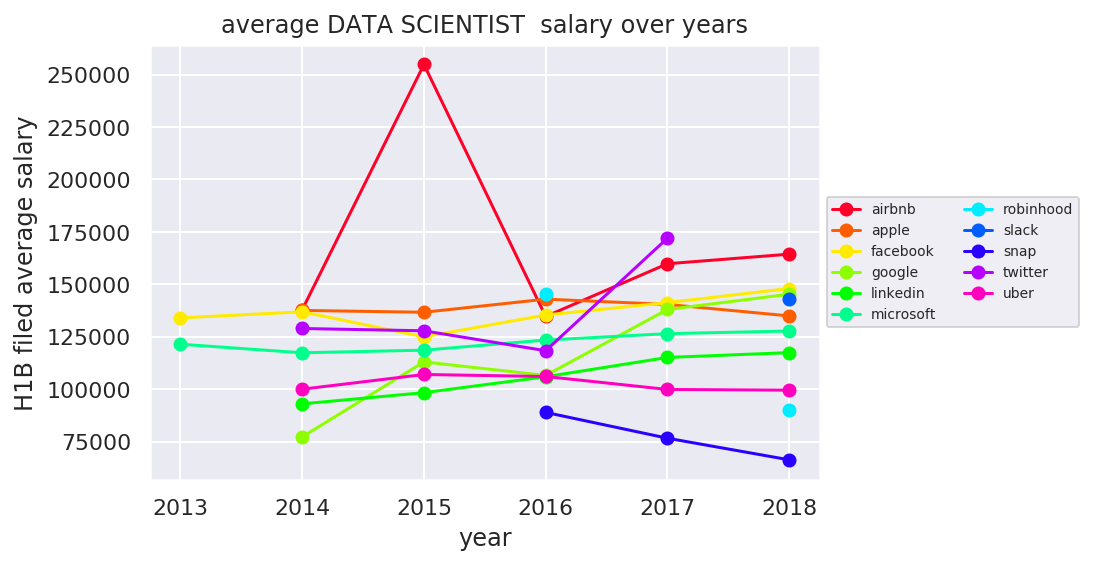

In [8]:
def plot_jobtitle_employer(title,employer_list,df):
    df_1 = df.loc[df['JOB TITLE CLEAR'] == title]
    df_2 = df_1.loc[df_1['EMPLOYER_CLEAR'].isin(employer_list)]
    df_2.groupby(['YEAR','EMPLOYER_CLEAR'])['BASE SALARY'].mean().unstack().plot(colormap = 'gist_rainbow',marker='o')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize = 'xx-small', ncol=2)
    plt.title('average ' + title + ' salary over years' )
    plt.ylabel('H1B filed average salary')
    plt.xlabel('year')
    plt.show()    

employer_list = ['google','facebook','airbnb','microsoft','uber','apple','slack','robinhood','snap','linkedin','twitter']
plot_jobtitle_employer('SOFTWARE ENGINEER ', employer_list,df)
plot_jobtitle_employer('DATA SCIENTIST ', employer_list,df)

**looks like Airbnb and Facebook are both good salary for SW engineer and DS.**

Also interested in the unicorn companies. 

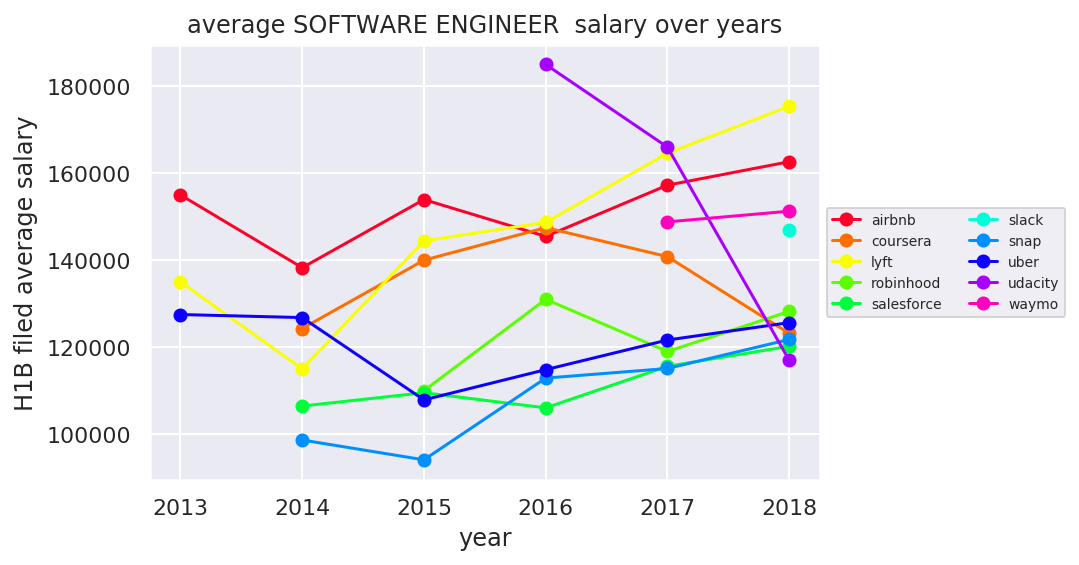

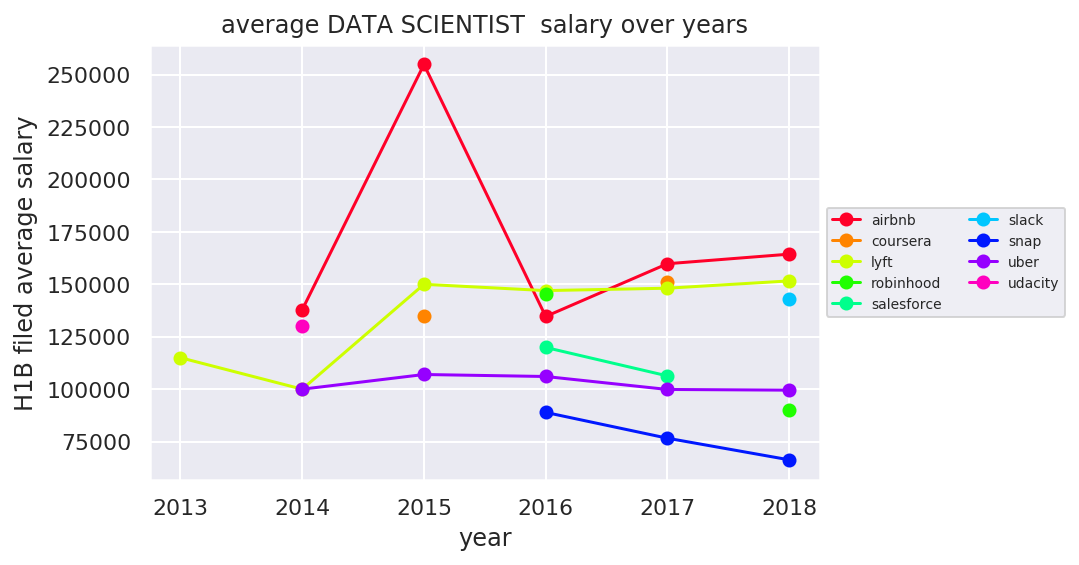

In [43]:
employer_list_unicorn = ['lyft','slack','robinhood','waymo','snap','coursera','udacity','salesforce','uber','airbnb']
plot_jobtitle_employer('SOFTWARE ENGINEER ', employer_list_unicorn,df)
plot_jobtitle_employer('DATA SCIENTIST ', employer_list_unicorn,df)

Next, we want to plot more informations on the same graph. The x can be year to file H1B and y can be mean salary. The color will be different companies and scatter size is how many H1B filed (the oppotinity size).

In [0]:
df_unicorn = scatter_helper('SOFTWARE ENGINEER ',employer_list_unicorn,df)

In [47]:
def scatter_helper(title,employer_list,df):
    df_1 = df.loc[df['JOB TITLE CLEAR'] == title]
    df_2 = df_1.loc[df_1['EMPLOYER_CLEAR'].isin(employer_list)]
    df_new1 = pd.DataFrame({'MEAN SALARY' : df_2.groupby( ['YEAR','EMPLOYER_CLEAR'] )['BASE SALARY'].mean(),'OPPORTUNITY':df_2.groupby( ['YEAR','EMPLOYER_CLEAR'] ).size()}).reset_index()
    return(df_new1)
  
df_new1 = scatter_helper('SOFTWARE ENGINEER ',employer_list,df)
print(df_new1)


    YEAR EMPLOYER_CLEAR    MEAN SALARY  OPPORTUNITY
0   2013         airbnb  155000.000000            1
1   2013          apple  110743.750000            8
2   2013       facebook  139002.964286           28
3   2013         google  130974.518987          158
4   2013       linkedin   94863.846154           13
5   2013      microsoft  119237.000000            8
6   2013        twitter  121239.000000           11
7   2013           uber  127500.000000            4
8   2014         airbnb  138269.230769           26
9   2014          apple  112550.229508           61
10  2014       facebook  138993.890585          393
11  2014         google  128275.903972         1687
12  2014       linkedin  105326.869565          115
13  2014      microsoft  118540.802360          339
14  2014           snap   98645.444444           18
15  2014        twitter  128439.386905          168
16  2014           uber  126799.370370           54
17  2015         airbnb  153939.462687           67
18  2015    

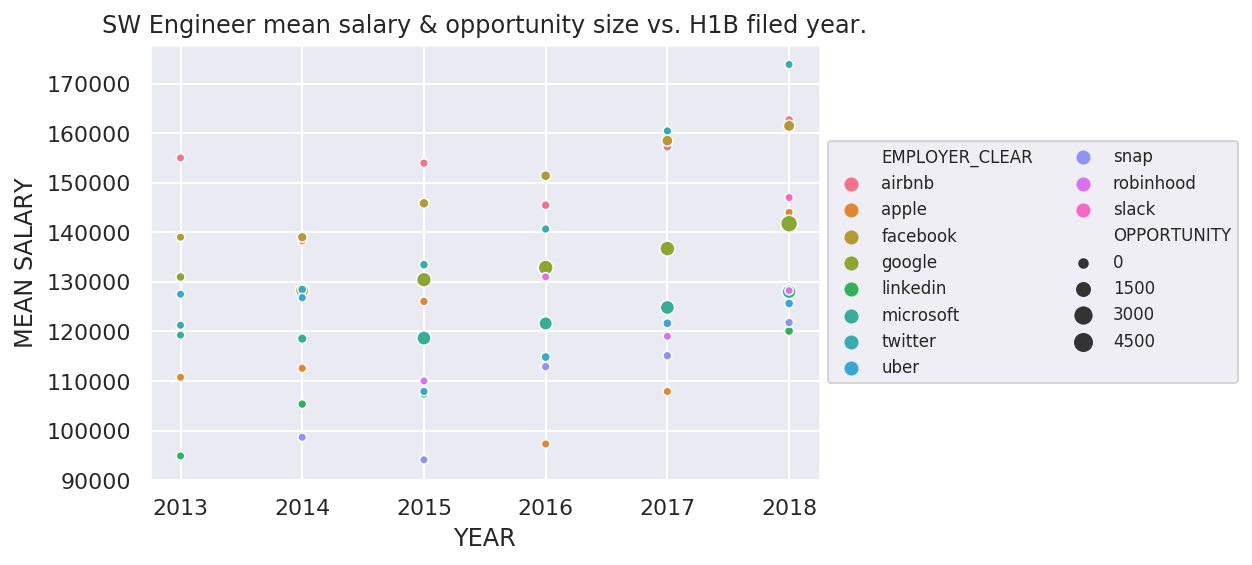

In [48]:
ax = sns.scatterplot(x="YEAR", y="MEAN SALARY",hue="EMPLOYER_CLEAR", size="OPPORTUNITY",data=df_new1)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize = 'x-small', ncol=2)
plt.title('SW Engineer mean salary & opportunity size vs. H1B filed year.')
plt.show()

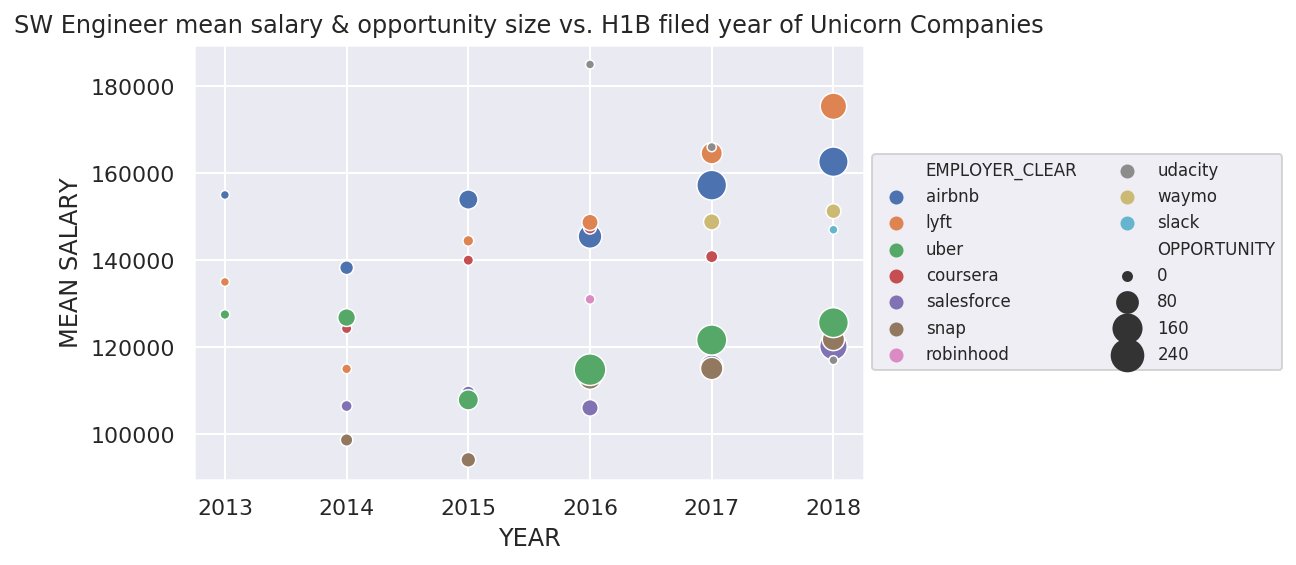

In [49]:
# unicorn SW oppotunities

ax = sns.scatterplot(x="YEAR", y="MEAN SALARY",hue="EMPLOYER_CLEAR", size="OPPORTUNITY",sizes = (20,250),data=df_unicorn)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize = 'x-small', ncol=2)
plt.title('SW Engineer mean salary & opportunity size vs. H1B filed year of Unicorn Companies')
plt.show()

We can make several functions and add more features.

In [50]:
def scatter_helper2(title_list,employer_list,df):
    df_1 = df.loc[df['JOB TITLE CLEAR'].isin(title_list)]
    df_2 = df_1.loc[df_1['EMPLOYER_CLEAR'].isin(employer_list)]
    df_new1 = pd.DataFrame({'MEAN SALARY' : df_2.groupby( ['YEAR','EMPLOYER_CLEAR','JOB TITLE CLEAR'] )['BASE SALARY'].mean(),'OPPORTUNITY':df_2.groupby( ['YEAR','EMPLOYER_CLEAR','JOB TITLE CLEAR'] ).size()}).reset_index()
    return(df_new1)

title_list = ['HARDWARE ENGINEER ', 'DATA SCIENTIST ', 'PROGRAM MANAGER ','PRODUCT MANAGER ']
df_new2 = scatter_helper2(title_list, employer_list,df)
print(df_new2)

     YEAR EMPLOYER_CLEAR     JOB TITLE CLEAR    MEAN SALARY  OPPORTUNITY
0    2013          apple    PROGRAM MANAGER   125000.000000            1
1    2013       facebook     DATA SCIENTIST   134000.000000            2
2    2013         google  HARDWARE ENGINEER   127000.000000            2
3    2013         google    PRODUCT MANAGER   154100.000000            1
4    2013         google    PROGRAM MANAGER   110333.333333            3
5    2013       linkedin    PRODUCT MANAGER   124638.500000            2
6    2013      microsoft     DATA SCIENTIST   121435.000000            1
7    2013      microsoft    PROGRAM MANAGER   113125.741935           31
8    2014         airbnb     DATA SCIENTIST   137857.142857            7
9    2014          apple     DATA SCIENTIST   137546.750000            4
10   2014          apple    PRODUCT MANAGER    74431.000000            1
11   2014          apple    PROGRAM MANAGER   120234.000000            2
12   2014       facebook     DATA SCIENTIST   13687

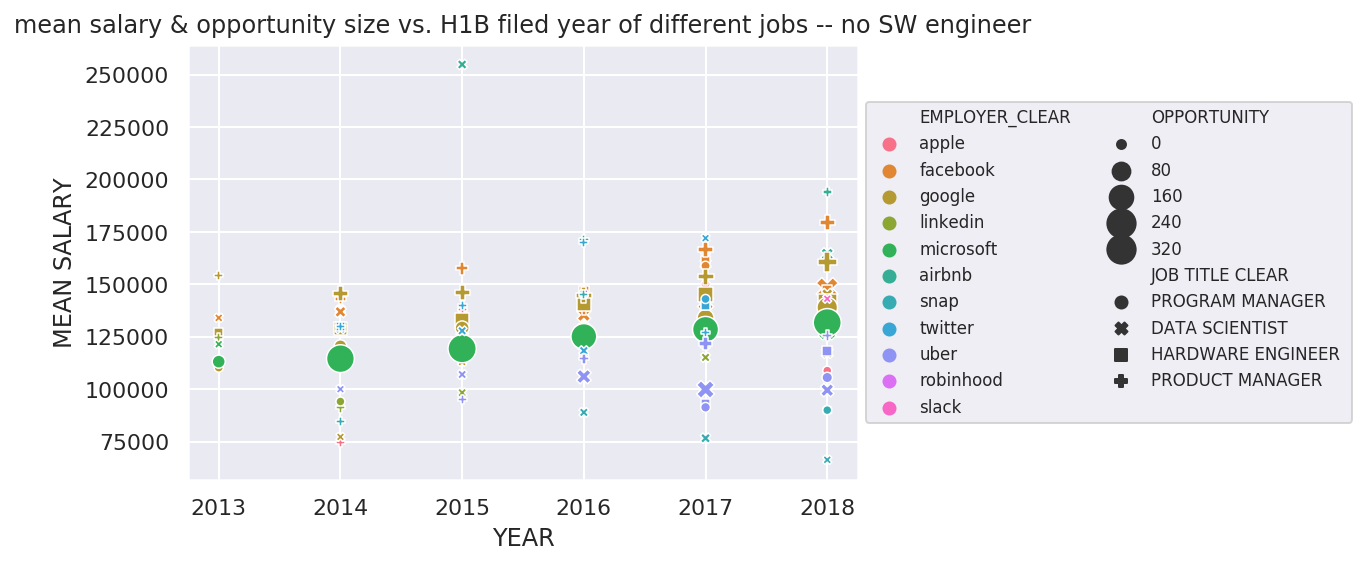

In [51]:
def sns_scatter_plot(df_new):
  ax = sns.scatterplot(x="YEAR", y="MEAN SALARY",hue="EMPLOYER_CLEAR",style="JOB TITLE CLEAR", size="OPPORTUNITY",sizes=(20, 200),data=df_new)
  plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize = 'x-small', ncol=2)
  plt.title('mean salary & opportunity size vs. H1B filed year of different jobs -- no SW engineer')
  plt.show()

sns_scatter_plot(df_new2)

Finnaly, I want to check the DS job information only.
First, big companies.

In [0]:
employer_list_big = ['google','facebook','microsoft','apple']
df_ds_bigCompany = scatter_helper('DATA SCIENTIST ',employer_list_big,df)
df_ds_unicorn = scatter_helper('DATA SCIENTIST ',employer_list_unicorn,df)

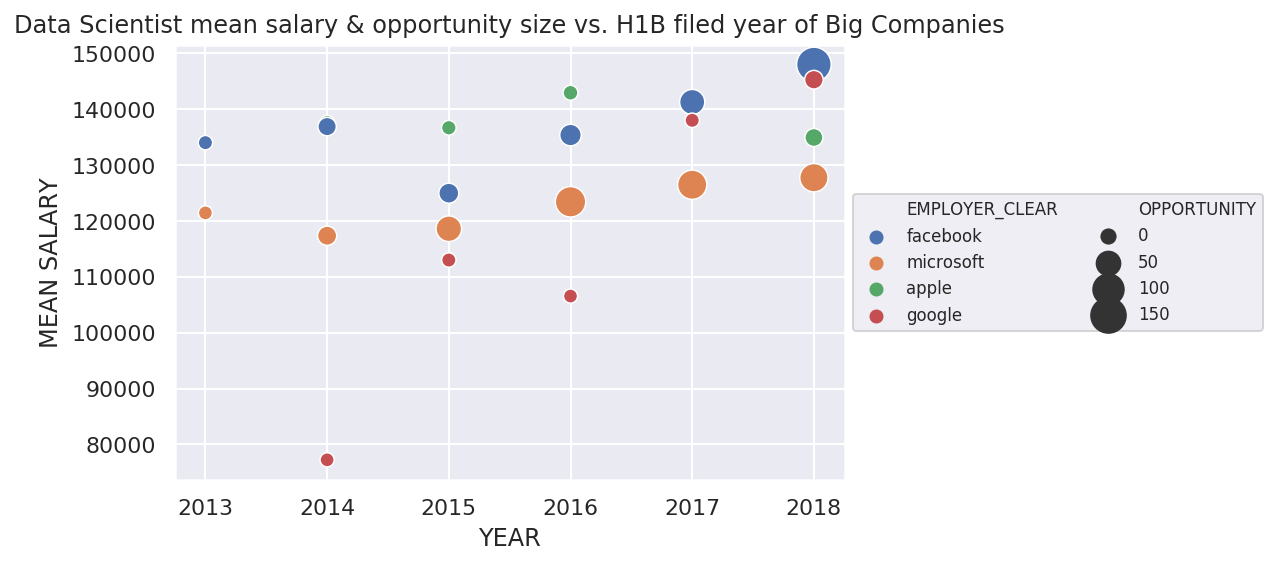

In [53]:
# Big company DS oppotunities

ax = sns.scatterplot(x="YEAR", y="MEAN SALARY",hue="EMPLOYER_CLEAR", size="OPPORTUNITY",sizes = (50,300),data=df_ds_bigCompany)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize = 'x-small', ncol=2)
plt.title('Data Scientist mean salary & opportunity size vs. H1B filed year of Big Companies')
plt.show()

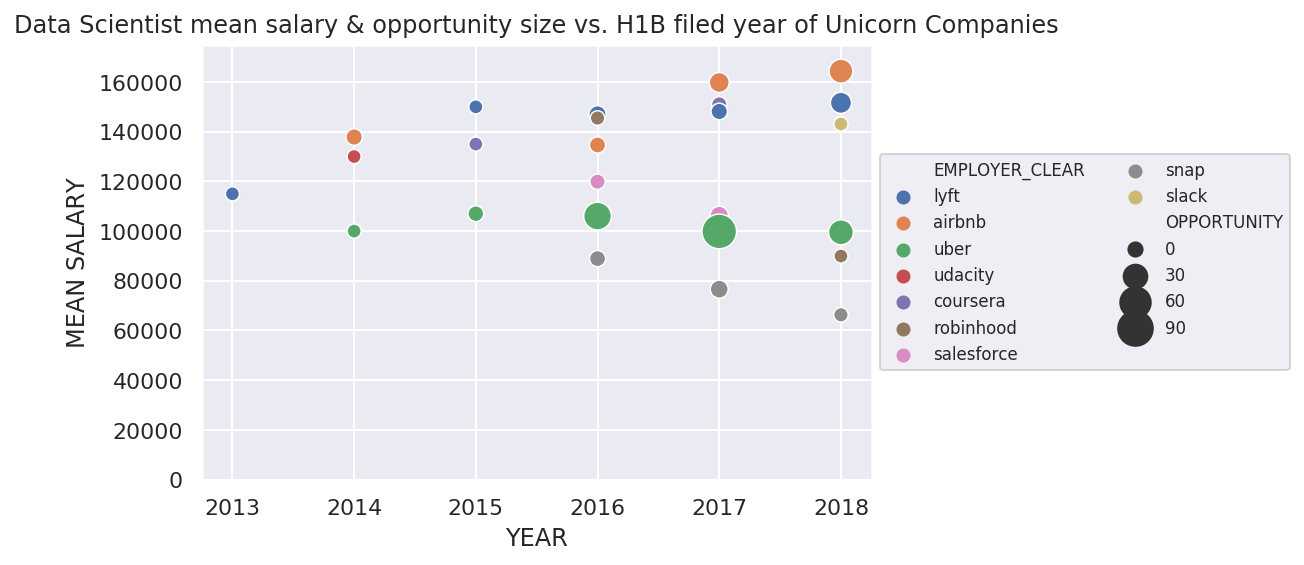

In [55]:
# Unicorn company DS oppotunities

ax = sns.scatterplot(x="YEAR", y="MEAN SALARY",hue="EMPLOYER_CLEAR", size="OPPORTUNITY",sizes = (50,300),data=df_ds_unicorn)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize = 'x-small', ncol=2)
plt.title('Data Scientist mean salary & opportunity size vs. H1B filed year of Unicorn Companies')
plt.ylim(0,175000)
plt.show()